In [30]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv('day.csv')

In [32]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [34]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [35]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
df.shape

(731, 16)

In [37]:
df.duplicated().sum()

0

In [38]:
df_drop=df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [39]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

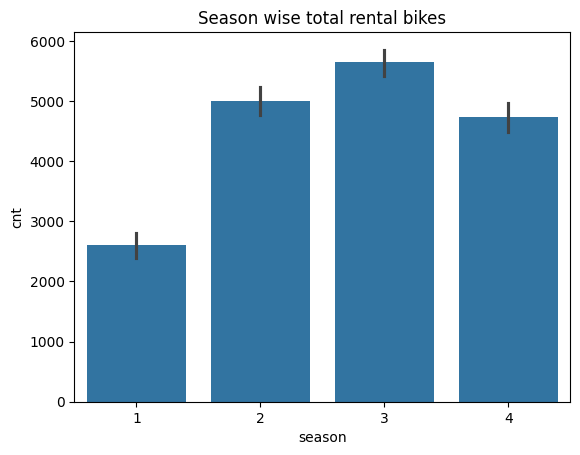

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=df,x='season',y='cnt')
plt.title('Season wise total rental bikes')
plt.show()

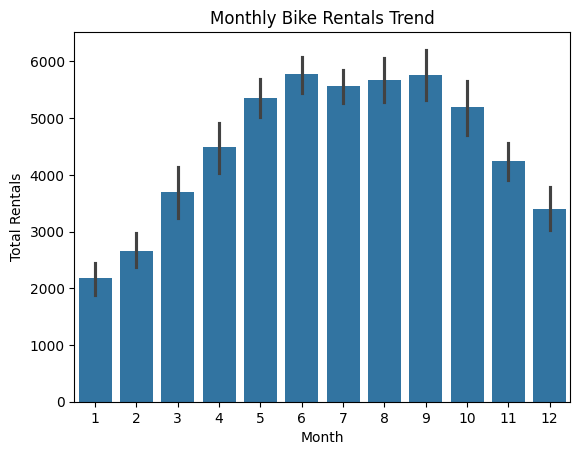

In [41]:
sns.barplot(x='mnth', y='cnt', data=df)
plt.title("Monthly Bike Rentals Trend")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.show()

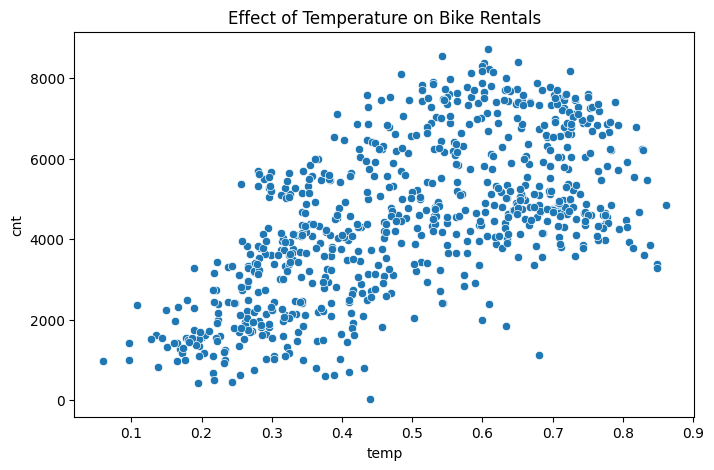

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title("Effect of Temperature on Bike Rentals")
plt.show()

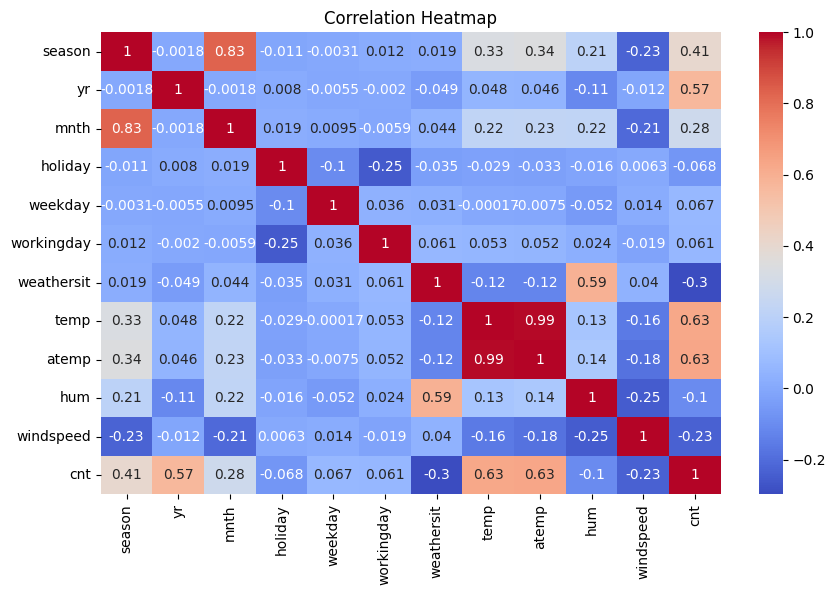

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [44]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [45]:
X=df.drop('cnt',axis=1)
y=df['cnt']

In [46]:
X.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))


In [51]:
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)



Linear Regression Performance:
MAE: 617.3930656443378
MSE: 691035.0082022649
RMSE: 831.2851545662685
R2 Score: 0.8276670090367213

Random Forest Performance:
MAE: 429.958299319728
MSE: 458446.9475870749
RMSE: 677.0871048743101
R2 Score: 0.8856707218333267


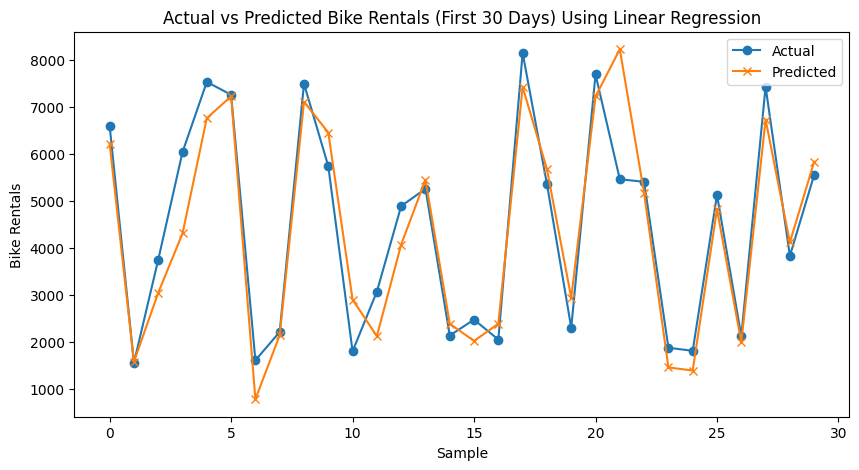

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(list(y_test.values)[:30], label='Actual', marker='o')
plt.plot(list(lr_pred)[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted Bike Rentals (First 30 Days) Using Linear Regression")
plt.xlabel("Sample")
plt.ylabel("Bike Rentals")
plt.legend()
plt.show()


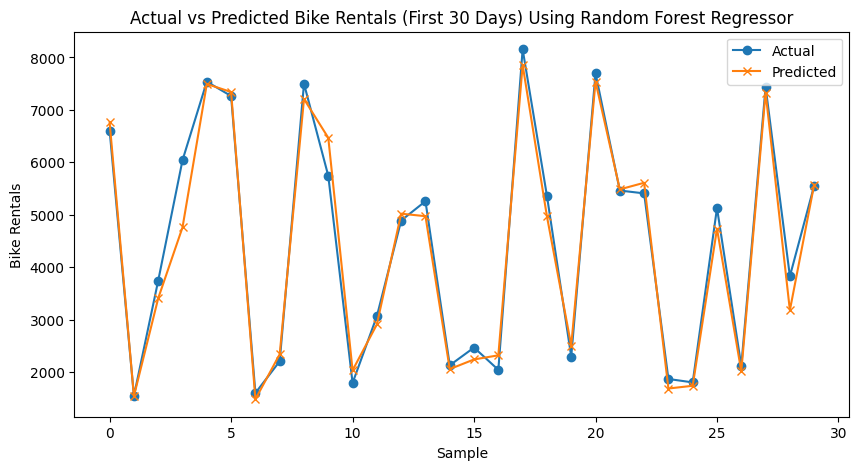

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(list(y_test.values)[:30], label='Actual', marker='o')
plt.plot(list(rf_pred)[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted Bike Rentals (First 30 Days) Using Random Forest Regressor")
plt.xlabel("Sample")
plt.ylabel("Bike Rentals")
plt.legend()
plt.show()


After comparing the graphs of both models — Linear Regression and Random Forest, it's clear that the Random Forest model performs better.

The Linear Regression model follows the general trend, but it doesn’t capture sudden increases or drops in bike rentals very well. Its predictions are more smooth and less accurate in some places.

On the other hand,Random Forest model closely matches the actual values. The predicted line almost overlaps with the actual line, showing that it understands the data patterns more accurately.